## Imports

In [1]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
from numba import njit
import time

##  Navier Stokes Equation

## Pure python

In [2]:
def build_up_b_numba(b, rho, dt, u, v, dx, dy):
    row, col = p.shape
        
        
    #fill the update of b

    return b

def pressure_poisson_numba(p, dx, dy, b):
    pn = np.empty_like(p)
    pn = np.copy()
    #fill the update of p
        
    return p

def cavity_flow_numba(nt, u, v, dt, nx, ny, dx, dy, p, rho, nu):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    b = np.zeros((ny, nx))
    
    pn = np.empty_like(p)
    pn = p.copy()
    
    #fill the update of u and v
        
        
    return u, v, p

## Numba accelerator

In [3]:
@njit(fastmath=True)
def build_up_b_pure(b, rho, dt, u, v, dx, dy):
    row, col = p.shape
        
        
    #fill the update of b

    return b

def pressure_poisson_pure(p, dx, dy, b):
    pn = np.empty_like(p)
    pn = np.copy()
    
    #fill the update of p
        
    return p

def cavity_flow_pure(nt, u, v, dt, nx, ny, dx, dy, p, rho, nu):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    b = np.zeros((ny, nx))
    
    pn = np.empty_like(p)
    pn = p.copy()
        
        
    return u, v, p

## Inputs

/tmp/ipykernel_5384/70601161.py:26: UserWarning: No contour levels were found within the data range.
  pyplot.contour(X, Y, p, cmap=cm.viridis)
/home/anouar/anaconda3/lib/python3.9/site-packages/matplotlib/quiver.py:679: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/anouar/anaconda3/lib/python3.9/site-packages/matplotlib/quiver.py:679: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


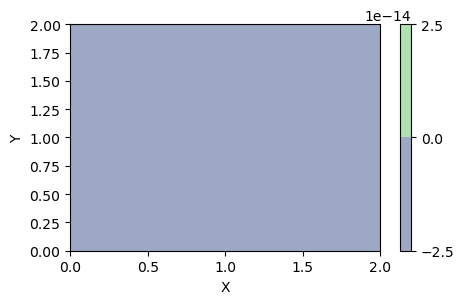

In [4]:
nx = 41
ny = 41
nt = 500
nit = 50
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
X, Y = np.meshgrid(x, y)

rho = 1
nu = .1
dt = .001

u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
b = np.zeros((ny, nx))

u, v, p = cavity_flow_numba(nt, u, v, dt, nx, ny, dx, dy, p, rho, nu)

fig = pyplot.figure(figsize=(5, 3), dpi=100)
pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
pyplot.colorbar()
pyplot.contour(X, Y, p, cmap=cm.viridis)
pyplot.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2])
pyplot.xlabel('X')
pyplot.ylabel('Y');

/tmp/ipykernel_5384/3382859310.py:4: UserWarning: No contour levels were found within the data range.
  pyplot.contour(X, Y, p, cmap=cm.viridis)


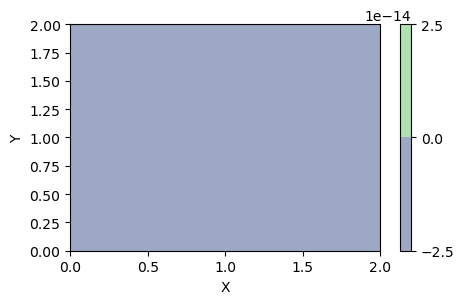

In [5]:
fig = pyplot.figure(figsize=(5, 3), dpi=100)
pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
pyplot.colorbar()
pyplot.contour(X, Y, p, cmap=cm.viridis)
pyplot.streamplot(X, Y, u, v)
pyplot.xlabel('X')
pyplot.ylabel('Y');

## Call Funtions

## Pure python function

In [6]:
%timeit cavity_flow_pure(nt, u, v, dt, ny, ny, dx, dy, p, rho, nu)

6.58 µs ± 139 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Numba accelerator

In [7]:
%timeit cavity_flow_numba(nt, u, v, dt, ny, ny, dx, dy, p, rho, nu)

6.52 µs ± 98.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
